In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Part 1

In [5]:
#A. 
df1= pd.read_csv("/Users/swati/Desktop/telecom_users.csv")

In [10]:
#B
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [11]:
df1.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


*Categorical=gender, customer_id, partner, dependents, phoneservice, multiple lines, internetservice, device protection, techsupport, streaming TV, streaming movies, contract, paperless billing, payment method, churn*


*Numerical= senior citizen, tenure, monthly charges, total charges*


*a. Yes we need to dummify our categorical variables in order to build or classfication models because there exists various levels in our variables such as payment method and in order to do classification, model will only be significant with numerical variables to detect pattern in our data and find the relation between variables.* 

In [68]:
df1.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [69]:
#b.
df2 = pd.get_dummies(df1, columns=['OnlineSecurity','OnlineBackup','gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod'])
df2


,Unnamed: 0,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1869,7010-BRBUU,0,72,24.10,1734.65,No,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,4528,9688-YGXVR,0,44,88.15,3973.2,No,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,6344,9286-DOJGF,1,38,74.95,2869.85,Yes,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,6739,6994-KERXL,0,4,55.90,238.5,No,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,432,2181-UAESM,0,2,53.45,119.5,No,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,0,1,95.00,95,Yes,0,0,1,...,1,1,0,0,0,1,0,0,1,0
5982,5191,5982-PSMKW,0,23,91.10,2198.3,No,0,0,1,...,1,0,0,1,0,1,0,1,0,0
5983,5226,8044-BGWPI,0,12,21.15,306.05,No,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,5390,7450-NWRTR,1,12,99.45,1200.15,Yes,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [70]:
#C.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df2['Churn'] = labelencoder.fit_transform(df2['Churn'])
df2

,Unnamed: 0,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1869,7010-BRBUU,0,72,24.10,1734.65,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,4528,9688-YGXVR,0,44,88.15,3973.2,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,6344,9286-DOJGF,1,38,74.95,2869.85,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,6739,6994-KERXL,0,4,55.90,238.5,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,432,2181-UAESM,0,2,53.45,119.5,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,0,1,95.00,95,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
5982,5191,5982-PSMKW,0,23,91.10,2198.3,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
5983,5226,8044-BGWPI,0,12,21.15,306.05,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,5390,7450-NWRTR,1,12,99.45,1200.15,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [71]:
#D.
df2['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [72]:
df2['Churn'].value_counts(normalize=True)

0    0.734881
1    0.265119
Name: Churn, dtype: float64

*Outcome classes are 0(no) and 1(yes). When we ran value counts without using normalize, we could see how many records showed customers who churned (1587) versus who did not (4399).* 

*When we ran the function with normalize=true in the argument, we can see the proportional difference between churning rate of customers. Like, 73.48% customers did not churn whereas 26.51% customerws churned.*

In [88]:
df3 = df2.drop(['Unnamed: 0', 'customerID', 'TotalCharges'], axis=1)

In [89]:
df3

,SeniorCitizen,tenure,MonthlyCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
5982,0,23,91.10,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
5983,0,12,21.15,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,1,12,99.45,1,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [91]:
df3.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,0,1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [93]:
df3.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Paperle

In [104]:
#E.
from sklearn.model_selection import train_test_split
X=df3[['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']] 
y=df3['Churn']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.4, random_state=9697)

*#a.Random state 9697 is my birth date- 6th sept 1997*

In [105]:
#F.
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_r,y_train_r)


RandomForestClassifier()

In [106]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [16, 20, 24],
    'min_samples_leaf': [24, 26, 28, 30, 32]
}

In [108]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=9697)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_r, y_train_r)

# best hyperparameters
print(CV_rfc.best_params_)

{'max_depth': 12, 'max_features': 24, 'min_samples_leaf': 26, 'n_estimators': 100}


In [110]:
best_rf=RandomForestClassifier(n_estimators=100, max_depth=12, max_features=24, 
                               min_samples_leaf=26, random_state=9697)
best_rf.fit(X_train_r,y_train_r)

RandomForestClassifier(max_depth=12, max_features=24, min_samples_leaf=26,
                       random_state=9697)

In [112]:
# G.
feature_imp_df = pd.DataFrame(list(zip(best_rf.feature_importances_, X_train_r)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
35,0.308028,Contract_Month-to-month
1,0.214214,tenure
3,0.134723,OnlineSecurity_No
2,0.105111,MonthlyCharges
21,0.061179,InternetService_Fiber optic
42,0.027895,PaymentMethod_Electronic check
26,0.016392,TechSupport_No
37,0.011725,Contract_Two year
20,0.011263,InternetService_DSL
36,0.010406,Contract_One year


*Yes, random forest model ranked the variables in a order of highest to lowest importance of input variables that most impacts the target variable (output). This means we find which variable is more important in finding churn rate on the basis of probabilities. In a random forest, input variables are devided on the basis of branches which means higher probability variables comes on the first branches which is later split into individual branches as per ranking order of other exisiting levels. For example, month to month is more impactful to derive churn rate as compared to one year and two year contracts.*

In [120]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_r, predictions))

Accuracy: 0.7908141962421712


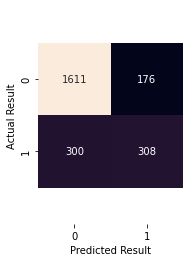

In [155]:
#H
%matplotlib inline
predictions_test_r = best_rf.predict(X_test_r)
mat = confusion_matrix(y_test_r, predictions_r)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [132]:
#i.
AccuracyRate=(1611+308)/(1611+176+300+308)
AccuracyRate



0.8012526096033403

In [144]:
#iv.
PrecisionRate=308/(176+308)
PrecisionRate
#Precision is when model said yes and how many times was it actually correct 

0.6363636363636364

In [147]:
#ii.
SensitivityRate=308/(300+308)
SensitivityRate
#Of the times actual outcome was yes, how often was it correct

0.506578947368421

In [151]:
#iii.
SpecificityRate=1611/(1611+176)
SpecificityRate
#Of the times actual outcome was no, how often was model correct.

0.9015109121432568

In [154]:
#v.
BalancedAccuracy=(SpecificityRate+SensitivityRate)/2
BalancedAccuracy

0.7040449297558389

In [158]:
#I.
prediction_train_r = best_rf.predict(X_train_r)

print (f'Training accuracy: {round(accuracy_score(y_train_r, prediction_train_r), 4)}')
print (f'Testing accuracy: {round(accuracy_score(y_test_r, predictions_test_r), 4)}')

Training accuracy: 0.8159
Testing accuracy: 0.8013


*Training accuracy was approximately 1.4% higher than that of testing accuracy. It is an acceptable difference as we are making a model for accuracy because it means our model is not overfitting because real world data brings differences in pattern and exact same accuracies would not be acceptable.*

In [166]:
#j.
swati = pd.DataFrame({'SeniorCitizen':1, 'tenure':21, 'MonthlyCharges':50,
       'OnlineSecurity_No':0, 'OnlineSecurity_No internet service':0,
       'OnlineSecurity_Yes':1, 'OnlineBackup_No':1,
       'OnlineBackup_No internet service':0, 'OnlineBackup_Yes':0, 'gender_Female':1,
       'gender_Male':0, 'Partner_No':0, 'Partner_Yes':1, 'Dependents_No':1,
       'Dependents_Yes':0, 'PhoneService_No':1, 'PhoneService_Yes':0,
       'MultipleLines_No':1, 'MultipleLines_No phone service':0,
       'MultipleLines_Yes':0, 'InternetService_DSL':1,
       'InternetService_Fiber optic':0, 'InternetService_No':0,
       'DeviceProtection_No':1, 'DeviceProtection_No internet service':0,
       'DeviceProtection_Yes':0, 'TechSupport_No':0,
       'TechSupport_No internet service':1, 'TechSupport_Yes':0, 'StreamingTV_No':0,
       'StreamingTV_No internet service':0, 'StreamingTV_Yes':1,
       'StreamingMovies_No':1, 'StreamingMovies_No internet service':0,
       'StreamingMovies_Yes':0, 'Contract_Month-to-month':1, 'Contract_One year':0,
       'Contract_Two year':0, 'PaperlessBilling_No':1, 'PaperlessBilling_Yes':0,
       'PaymentMethod_Bank transfer (automatic)':0,
       'PaymentMethod_Credit card (automatic)':1,
       'PaymentMethod_Electronic check':0, 'PaymentMethod_Mailed check':0}, index=[0])

In [167]:
swati

,SeniorCitizen,tenure,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,gender_Female,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,21,50,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [169]:
prediction_swati = best_rf.predict(swati)
prediction_swati


array([0])

In [171]:
print(best_rf.predict_proba(swati))

[[0.75318404 0.24681596]]


*a. This means my subscriber would not churn*
*b. There is 24.68% probability that this new subscriber would churn.*

# Part 2

In [198]:
#K.
df1.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [199]:
#L.
feature_imp_df.head(12)

,feature importance,feature
35,0.308028,Contract_Month-to-month
1,0.214214,tenure
3,0.134723,OnlineSecurity_No
2,0.105111,MonthlyCharges
21,0.061179,InternetService_Fiber optic
42,0.027895,PaymentMethod_Electronic check
26,0.016392,TechSupport_No
37,0.011725,Contract_Two year
20,0.011263,InternetService_DSL
36,0.010406,Contract_One year


*#a.*
*Top 12 features= Contract, tenure, InternetService, MonthlyCharges, OnlineSecurity, PaymentMethod, 
              TechSupport, PaperlessBilling, OnlineBackup*
              
              


In [200]:
#b. 
top_12=['Contract', 'tenure', 'InternetService', 'MonthlyCharges', 'OnlineSecurity', 'PaymentMethod', 'TechSupport', 'PaperlessBilling', 'OnlineBackup']
lr_df = df1[top_12 + ['Churn']]


In [201]:
lr_df.columns

Index(['Contract', 'tenure', 'InternetService', 'MonthlyCharges',
       'OnlineSecurity', 'PaymentMethod', 'TechSupport', 'PaperlessBilling',
       'OnlineBackup', 'Churn'],
      dtype='object')

In [202]:
lr_df=pd.get_dummies(lr_df, drop_first=True, columns=['Contract', 'InternetService',
       'OnlineSecurity', 'PaymentMethod', 'TechSupport', 'PaperlessBilling',
       'OnlineBackup', 'Churn'])

In [187]:
lr_df

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Churn_Yes
0,72,24.10,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0
1,44,88.15,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,38,74.95,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,4,55.90,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2,53.45,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,95.00,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
5982,23,91.10,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0
5983,12,21.15,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0
5984,12,99.45,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1


In [203]:
#M.
correlation= lr_df.corr()
correlation

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_No internet service,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Churn_Yes
tenure,1.000000,0.256983,0.199490,0.558536,0.027390,-0.043596,-0.043596,0.331981,0.236183,-0.200316,-0.231891,-0.043596,0.329410,0.006569,-0.043596,0.358248,-0.348469
MonthlyCharges,0.256983,1.000000,0.005987,-0.069517,0.785673,-0.761178,-0.761178,0.303575,0.028279,0.270073,-0.380263,-0.761178,0.341569,0.355816,-0.761178,0.445749,0.186753
Contract_One year,0.199490,0.005987,1.000000,-0.293076,-0.074786,0.038487,0.038487,0.101849,0.067461,-0.112865,0.007943,0.038487,0.104439,-0.052273,0.038487,0.079996,-0.175855
Contract_Two year,0.558536,-0.069517,-0.293076,1.000000,-0.208187,0.216825,0.216825,0.190749,0.179277,-0.273923,-0.007961,0.216825,0.240586,-0.153529,0.216825,0.112199,-0.301906
InternetService_Fiber optic,0.027390,0.785673,-0.074786,-0.208187,1.000000,-0.463736,-0.463736,-0.025892,-0.051256,0.334230,-0.310029,-0.463736,-0.016634,0.330319,-0.463736,0.166510,0.300898
InternetService_No,-0.043596,-0.761178,0.038487,0.216825,-0.463736,1.000000,1.000000,-0.332015,0.002935,-0.281928,0.324704,1.000000,-0.335004,-0.322736,1.000000,-0.384069,-0.223860
OnlineSecurity_No internet service,-0.043596,-0.761178,0.038487,0.216825,-0.463736,1.000000,1.000000,-0.332015,0.002935,-0.281928,0.324704,1.000000,-0.335004,-0.322736,1.000000,-0.384069,-0.223860
OnlineSecurity_Yes,0.331981,0.303575,0.101849,0.190749,-0.025892,-0.332015,-0.332015,1.000000,0.113863,-0.102619,-0.084277,-0.332015,0.352356,0.004057,-0.332015,0.286817,-0.174301
PaymentMethod_Credit card (automatic),0.236183,0.028279,0.067461,0.179277,-0.051256,0.002935,0.002935,0.113863,1.000000,-0.374485,-0.287231,0.002935,0.118081,-0.019713,0.002935,0.090068,-0.135232
PaymentMethod_Electronic check,-0.200316,0.270073,-0.112865,-0.273923,0.334230,-0.281928,-0.281928,-0.102619,-0.374485,1.000000,-0.386586,-0.281928,-0.108761,0.210580,-0.281928,0.003422,0.296803


<AxesSubplot:>

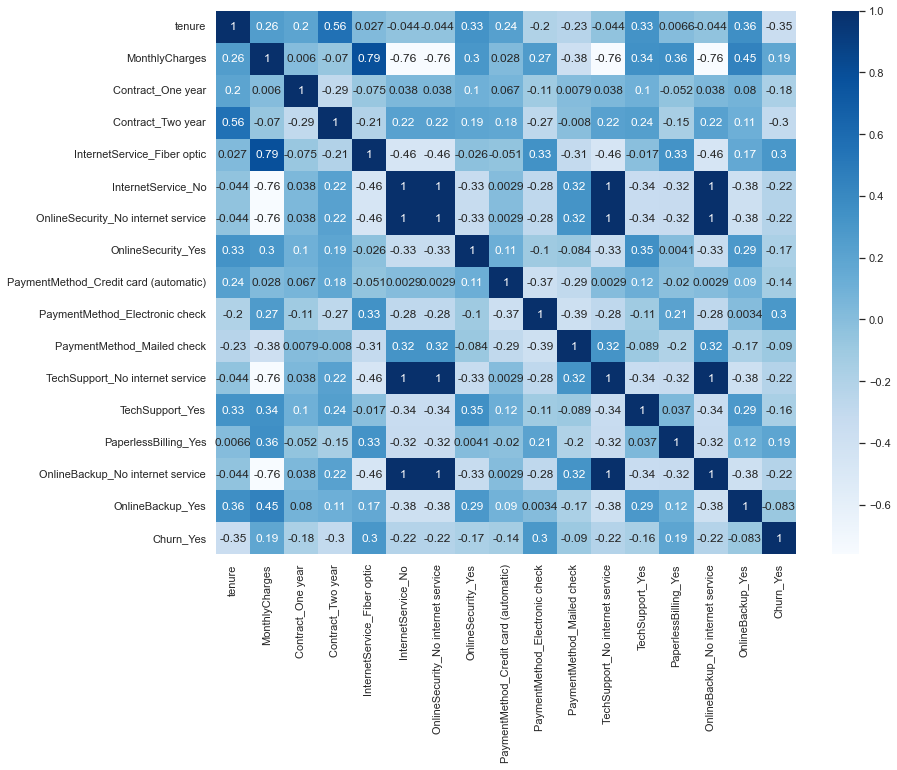

In [204]:

sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(correlation, cmap="Blues", annot=True)

In [197]:
lr_df.columns


Index(['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_Yes', 'PaperlessBilling_Yes', 'OnlineBackup_Yes',
       'Churn_Yes'],
      dtype='object')

In [205]:
#dropping highly correlated variables. 
lr_df = lr_df.drop(['TechSupport_No internet service', 'OnlineSecurity_No internet service', 
                          'OnlineBackup_No internet service'], axis=1)

In [207]:
lr_df

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes,Churn_Yes
0,72,24.10,0,1,0,1,0,1,0,0,0,0,0,0
1,44,88.15,0,0,1,0,0,1,0,0,0,1,1,0
2,38,74.95,0,0,1,0,0,0,0,0,0,1,0,1
3,4,55.90,0,0,0,0,0,0,1,0,0,1,0,0
4,2,53.45,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,95.00,0,0,1,0,1,0,1,0,0,1,0,1
5982,23,91.10,0,1,0,0,1,1,0,0,1,1,1,0
5983,12,21.15,0,0,0,1,0,0,1,0,0,1,0,0
5984,12,99.45,0,0,1,0,0,0,1,0,0,1,0,1


In [209]:
lr_df.columns

Index(['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_Yes', 'PaperlessBilling_Yes', 'OnlineBackup_Yes',
       'Churn_Yes'],
      dtype='object')

In [211]:
#N. Partitioning data
X=lr_df[['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_Yes', 'PaperlessBilling_Yes', 'OnlineBackup_Yes',
       ]] 
y=lr_df['Churn_Yes']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.4, random_state=9697)

In [215]:
#O. Logistic Regression Model
X_train_lr

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes
2231,13,96.85,0,0,1,0,0,0,1,0,0,1,0
5287,15,58.95,0,0,0,0,1,0,1,0,1,0,0
3130,57,100.60,0,0,1,0,0,0,1,0,0,1,1
3303,11,58.95,0,0,0,0,0,0,0,1,0,1,0
4190,3,80.35,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,63,89.60,0,0,1,0,0,0,0,0,0,1,0
1569,7,101.95,0,0,1,0,0,0,1,0,0,1,0
3659,69,20.15,0,1,0,1,0,0,0,0,0,0,0
3561,1,80.30,0,0,1,0,1,0,1,0,0,1,0


In [218]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train_lr, y_train_lr)
 

LogisticRegression(max_iter=500)

In [223]:
#P.
lr_df2=pd.DataFrame(data=logmodel.coef_.transpose(),index=X_train_lr.columns,columns=['Coef'])
lr_df2['odds ratio'] = np.exp(lr_df2['Coef'])
lr_df2['%'] = 1-lr_df2['odds ratio']

lr_df2

,Coef,odds ratio,%
tenure,-0.030480,0.969980,0.030020
MonthlyCharges,0.012004,1.012076,-0.012076
Contract_One year,-0.620361,0.537750,0.462250
Contract_Two year,-1.193224,0.303242,0.696758
InternetService_Fiber optic,0.496169,1.642417,-0.642417
InternetService_No,-0.802391,0.448256,0.551744
OnlineSecurity_Yes,-0.539404,0.583096,0.416904
PaymentMethod_Credit card (automatic),0.005293,1.005307,-0.005307
PaymentMethod_Electronic check,0.351062,1.420575,-0.420575
PaymentMethod_Mailed check,-0.027290,0.973079,0.026921


***a.Numerical***
*As we can see both of our numeric variables (tenure and monthly charges) have a negative sign before the magnitude value, that indicates the decrease in outcome class because of these variables.*

*As the tenure jumped to another month/year, churn rate reduced by 0.0304%*

*As the monthly charges went up i.e. for money spent, churn rate reduces by 0.012%*


***b. Categorical-***

*Contract= As we offer a contract of one year, churn rate reduces by 0.62 whereas if offer contract of two years, churn rate decreases by 1.19*


*InternetService= If we are offering fiber optical internet service, churn rate increases by 0.49 whereas no internet service reduces the churn rate by 0.80*

*OnlineSecurity=Online security reduces the churn rate by 0.53*

*Payment method=Electronic check showed the highest increase in churn rate by 0.35 whereas credit card showed a decrease in 0.0052 and mailed check decreases churn by 0.02*

*Tech support= if chosen a tech support, the churn rate reduces by 0.24*

*Paperless Billing= It increases the churn rate by 0.34 because it might seem useful to avoid choas of paper bills*

*Online Backup= It reduces the churn rate by 0.17 for every backup option provided*

In [226]:
#Q
predictions_lr = logmodel.predict(X_test_lr)
predictions_lr

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [229]:
logmodel.predict_proba(X_test_lr)

array([[0.8858765 , 0.1141235 ],
       [0.98405412, 0.01594588],
       [0.33403711, 0.66596289],
       ...,
       [0.9310626 , 0.0689374 ],
       [0.96784661, 0.03215339],
       [0.6003457 , 0.3996543 ]])

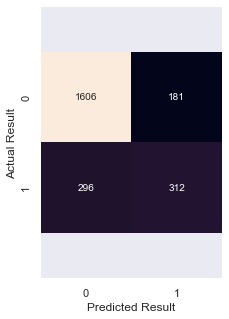

In [232]:
mat = confusion_matrix(y_test_lr, predictions_lr)
plt.figure(figsize=(5,5))
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [234]:
#i. 
accuracyrate_lr= (1606+312)/(1606+181+296+312)
accuracyrate_lr

0.8008350730688936

In [238]:
#ii. 
sensitivityrate_lr=312/(296+312)
sensitivityrate_lr

0.5131578947368421

In [241]:
#iii.
specifityrate_lr=1606/(1606+181)
specifityrate_lr

0.8987129266927812

In [243]:
#iv.
precisionrate_lr=312/(312+181)
precisionrate_lr

0.6328600405679513

In [246]:
#v.
balancedacc_lr=(specifityrate_lr+sensitivityrate_lr)/2
balancedacc_lr

0.7059354107148117

In [251]:
#R.
prediction_train_lr = logmodel.predict(X_train_lr)
print (f'Training accuracy: {round(accuracy_score(y_train_lr, prediction_train_lr), 3)}')
print (f'Testing accuracy: {round(accuracy_score(y_test_lr, predictions_lr), 3)}')

Training accuracy: 0.792
Testing accuracy: 0.801


*a. the purpose of comparing these two values is to check if our training model makes a fiting pattern for our test data so that we can measure if we built a reliable model for future data.*

*b.The training dat showed 0.1% less accuracy as compared with test data. This is an acceptable rate because we know that our model would not overfit when the new data comes*

In [254]:
lr_df.columns

Index(['tenure', 'MonthlyCharges', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TechSupport_Yes', 'PaperlessBilling_Yes', 'OnlineBackup_Yes',
       'Churn_Yes'],
      dtype='object')

In [261]:
lr_df.describe()

,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TechSupport_Yes,PaperlessBilling_Yes,OnlineBackup_Yes,Churn_Yes
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,0.213164,0.240728,0.438857,0.215670,0.286168,0.217675,0.335115,0.228700,0.289843,0.589375,0.349148,0.265119
std,24.516391,30.114702,0.409577,0.427561,0.496289,0.411321,0.452007,0.412699,0.472070,0.420031,0.453727,0.491988,0.476741,0.441433
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,56.000000,89.900000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
#S.
swati = pd.DataFrame({'tenure': 9, 'MonthlyCharges': 50, 
       'Contract_One year': 1, 'Contract_Two year': 0,
       'InternetService_Fiber optic': 1, 'InternetService_No': 0,
       'OnlineSecurity_Yes':0, 'PaymentMethod_Credit card (automatic)': 0,
       'PaymentMethod_Electronic check': 1, 'PaymentMethod_Mailed check': 0,
       'TechSupport_Yes':0, 'PaperlessBilling_Yes':1, 'OnlineBackup_Yes':1,}, index=[0])

In [259]:
prediction_swati_lr=logmodel.predict(swati)
print (prediction_swati_lr)
print (logmodel.predict_proba(swati))

[0]
[[0.56142255 0.43857745]]


*a. My model predicted that swati will not churn*


*b. Their is 43.85% probability that swati could churn, actually we could implement some great marketing strategies (discounts, offers etc) to influence this person as we have almost 50% chance that this person could change their decision and might churn.*

***T***

*It is important to be careful of using values in the range of dataset used to build the model because we have built a model that would take account of values which machine or regression model has learned. Also, the relationship between output and input variables would break if we use values outside the range.*

In [277]:
#a. 
swati2 = pd.DataFrame({'tenure': 60, 'MonthlyCharges': 120, 
       'Contract_One year': 1, 'Contract_Two year': 0,
       'InternetService_Fiber optic': 1, 'InternetService_No': 0,
       'OnlineSecurity_Yes':0, 'PaymentMethod_Credit card (automatic)': 0,
       'PaymentMethod_Electronic check': 1, 'PaymentMethod_Mailed check': 0,
       'TechSupport_Yes':0, 'PaperlessBilling_Yes':1, 'OnlineBackup_Yes':1,}, index=[0])

In [279]:
prediction_swati_lr=logmodel.predict(swati2)
print (prediction_swati_lr)
print (logmodel.predict_proba(swati2))

[0]
[[0.72335424 0.27664576]]


*My predictor says that the person will not churn with a probability of 72% not churning. We can see when we tried to use values out of range, our results woould be irrelavant because our model has learnt to predict from the existing range. For any values higher or lower than range, it will not be a reliable result.*

***U***

*A telephone company would care about being able to use this model because this can help them derive strategies to increase their churn rate. For example- if telephone company works towards reducing their costs of providing the serviice to a customer and fall in a group of equal quality and less monthly charges, subsrcibers would be willing to join and take the membership. Also, probabilities would be an effective source in finding the audience who are 50-50% likely towards becoming a subsrciber or not, company can take essentail steps which could influence their decisions.*